<figure>
  <IMG SRC="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" WIDTH=200 ALIGN="right">
</figure>
<figure>
  <IMG SRC="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" WIDTH=200 ALIGN="right">
</figure>

# CEGM1000 Modelling, Uncertainty and Data for Engineers
    
# Modelling the uncertainty in the energy demand in Washington city

Predicting energy demand is a hot topic in the literature since energy cannot be easily stored and, thus, the network needs to be in balance (demand=offer). However, energy consumption derives from a highly uncertain and very complex system. Therefore, probabilistic tools need to be applied to model this uncertainty. In this workshop, you will work with hourly data of the energy consumption in Washington during year 2010. 

**The goal of this project is:**
1. Choose a reasonable distribution function for the energy consumption by analyzing the statistics of the observations.
2. Fit the chosen distributions by moments.
3. Assess the fit computing probabilities analytically.
4. Assess the fit using goodness of fit techniques and computer code.

## Importing packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats 
from math import ceil, trunc

plt.rcParams.update({'font.size': 14})

## 1. Explore the data

First step in the analysis is exploring the data, visually and through its statistics.

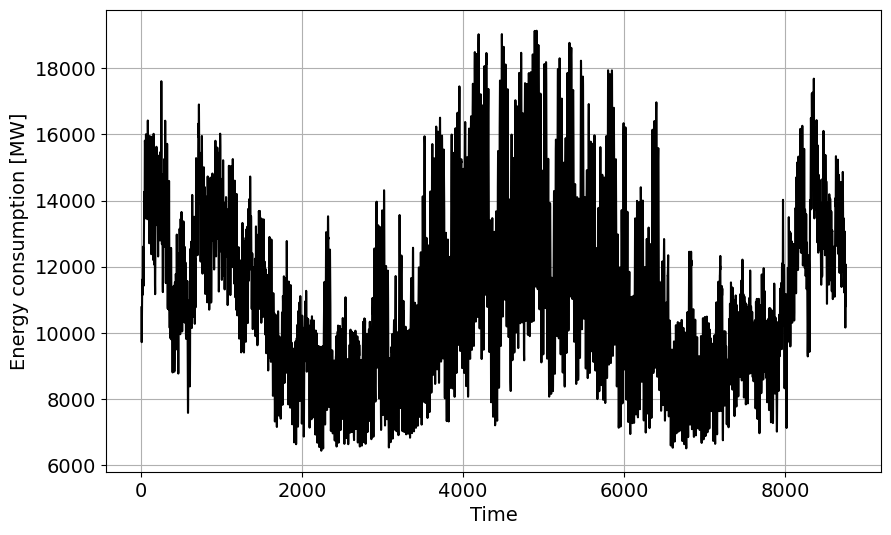

In [6]:
# Import
data = np.genfromtxt('energy_Washington.csv', delimiter=",")

# Clean
data = data[~np.isnan(data)]

# plot time series
plt.figure(figsize=(10, 6))
plt.plot(data,'k')
plt.xlabel('Time')
plt.ylabel('Energy consumption [MW]')
plt.grid()

In the figure above, you can see the energy consumption evolution along the year. It is not shown in the plot, but the data goes from 1st January to 31st December. You can see how there is a peak in the demand during summer and winter due to AC and heating. Also, there is a big oscillation around that yearly oscillation. Let's see how the statistics look like!

In [7]:
# Statistics

df_describe = pd.DataFrame(data)
df_describe.describe()

,0
count,8757.000000
mean,11280.065548
std,2624.774478
min,6430.000000
25%,9418.000000
50%,10856.000000
75%,13042.000000
max,19140.000000


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">

**Task 1:**

Using **ONLY** the statistics calculated in the previous lines:

- Choose an appropriate distribution to model the data between the following: (1) Gumbel, (2) Uniform, and (3) Normal.
- Justiy your choice.

</div>

read observations

#Assume the bin size
bin_size = 2

#Calculate the number of bins and the bin edges given the bin size
min_value = minimum value of observations
max_value = maximum value observations 
n_bins = (max_value - min_value) / bin_size 
bin_edges = range of n_bins + 1 values between the truncated value \
            of min_value and the ceiling value of max_value

#Count the number of observations in each bin
count = empty list
for each bin:
    append the number of observations between the bin_edges to count

#Compute relative frequencies
freq = count / number of observations

#Compute densities
densities = freq / bin_size

#plot epdf
barplot densities

6430
19140
n_bins is 127.1
126
Empty count array is 127
1.0
2.0
3.0
4.0
5.0
6.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
1.0
2.0
3.

TypeError: only size-1 arrays can be converted to Python scalars

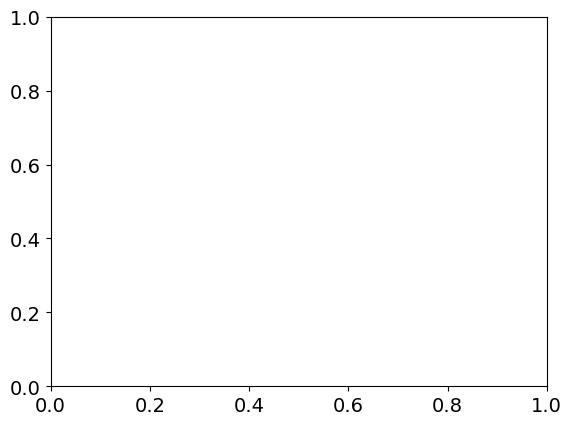

In [58]:
#mu, beta = 0, 0.1 # location and scale
#s = np.random.gumbel(mu, beta, 1000)
#count, bins, ignored = plt.hist(s, 30, density=True)

bin_size = 100
min_value = df_describe.to_numpy().min()
max_value = df_describe.to_numpy().max()
print(trunc(min_value))
print(ceil(max_value))
n_bins = (max_value - min_value)/bin_size
print(f"n_bins is {n_bins}")
bin_edges = np.array(range(trunc(min_value), ceil(max_value)+ 1,bin_size + 1))
print(len(np.array(bin_edges)))

count = np.zeros(int(n_bins))
print(f"Empty count array is {len(count)}")

for i in range(len(count)-2):
    for j in range(0, len(df_describe.to_numpy())):
        if df_describe.to_numpy()[j] > bin_edges[i] and df_describe.to_numpy()[j] < bin_edges[i + 1]:
            count[i] += 1
            print(count[i])
print(f"Filled count array is {count}")

#Compute relative frequencies
freq = count / len(df_describe.to_numpy())
print(freq)
densities = freq / bin_size
print(densities)
plt.bar(df_describe.to_numpy(), densities)


# plt.hist(data, bins= int(n_bins))


std = df_describe.to_numpy().std()


beta = np.sqrt(6)*std/np.pi

mu =  df_describe.to_numpy().mean() - 0.577*beta

pdf = stats.gumbel_r.pdf(data, loc=mu, scale=beta)
plt.plot(data, scale* pdf, label='Gumbel PDF', color='b',linewidth = 1)
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Gumbel Distribution')
plt.legend()
plt.show()


# Create a range of x-values
# x = np.linspace(stats.gumbel_r.ppf(0.001, loc=mu, scale=beta),
#                 stats.gumbel_r.ppf(0.999, loc=mu, scale=beta), 1000)

# # Calculate the probability density function (PDF) values
# pdf = stats.gumbel_r.pdf(x, loc=mu, scale=beta)

# # Plot the PDF of the Gumbel distribution
# plt.plot(x, pdf, label='Gumbel PDF', color='b')
# plt.xlabel('x')
# plt.ylabel('PDF')
# plt.title('Gumbel Distribution')
# plt.legend()
# plt.grid(True)
# plt.show()

In [32]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


## 2. Use pen and paper!

Once you have selected the appropriate distribution, you are going to fit it by moments manually and check the fit by computing some probabilities analytically. Remember that you have all the information you need in the textbook. Do not use any computer code for this section, you have to do in with pen and paper. You can use the notebook as a calculator.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>   
Fit the selected distribution by moments.
</p>
</div>

We can now check the fit by computing manually some probabilities from the fitted distribution and comparing them with the empirical ones.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">

**Task 3:**

Check the fit of the distribution:

- Calculate the empirical probabilities corresponding to the minimum, P25%, P50%, P75% and maximum value given in the statistics table in the previous section.
- Compute the values of the random variable corresponding to those probabilities using the fitted distribution.
- Compare the obtained values with the empirical ones and assess the fit.

</div>

## 3. Let's use code

Now, let's assess the performance using further goodness of fit metrics and see whether they are consistent with the previously done analysis.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4:</b>   
Prepare a function to compute the empirical cumulative distribution function.
</p>
</div>

In [7]:
def ecdf(var):
    '''
    x represents the values of the random variable
    y represents the associated non-exceedance probabilities
    ''' 
    x = np.sort(var)
    length = len(x)
    
    # Always remember to range(1, x + 1) because the range function ends 1 index before the end value.
    prob_non_exceedance = np.array(range(1,length+1,1))/ length + 1
    y = prob_non_exceedance

    # print(x.size)
    # print(y.size)
    # plt.plot(x, y)  
    
    return [y, x]

ecdf(data)

[array([1.00011419, 1.00022839, 1.00034258, ..., 1.99977161, 1.99988581,
        2.        ]),
 array([ 6430.,  6465.,  6499., ..., 19105., 19134., 19140.])]

In [3]:
test = stats.gumbel_r()


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>   
Transform the fitted parameters for the selected distribution to loc-scale-shape.
</p>
</div>

Hint: Use [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html) documentation.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">

**Task 6:**

Assess the goodness of fit of the fitted distribution by:

- Comparing the empirical and fitted PDF.
- Using the exceedance plot in log-scale.
- Using the QQplot.
- Interpret them. Do you reach a conclusion similar to that in the previous section?

</div>

Hint: Use [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html) built in functions (watch out with the parameters definition!).

In [ ]:
#Comparing PDF

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.hist(data, edgecolor='k', linewidth=0.2, 
             color='cornflowerblue', label='Empirical PDF', density = True)
axes.plot(???, ???, 'k', linewidth=2, 
            label='Gumbel PDF')
axes.set_xlabel('Energy consumption [MW]')
axes.set_title('PDF', fontsize=18)
axes.legend()

In [ ]:
#Logscale

fig, axes = plt.subplots(1, 1, figsize=(10, 5))

axes.step(ecdf(data)[1], 1-ecdf(data)[0], 
             color='k', label='Empirical CDF')
axes.plot(???, ???,
             color='cornflowerblue', label='Gumbel CDF')
axes.set_xlabel('Energy consumption [MW]')
axes.set_ylabel('${P[X > x]}$')
axes.set_title('Exceedance plot in log-scale', fontsize=18)
axes.set_yscale('log')
axes.legend()
axes.grid()

In [ ]:
# QQplot

fig, axes = plt.subplots(1, 1, figsize=(10, 5))

axes.plot([0, 30000], [0, 30000], 'k')
axes.scatter(???, ???, 
             color='cornflowerblue', label='Gumbel')
axes.set_xlabel('Observed energy consumption [MW]')
axes.set_ylabel('Estimated energy consumption [MW]')
axes.set_title('QQplot', fontsize=18)
axes.grid()

**End of the notebook**